# Introduction to OpenCV - Exercises
## Computer Vision and Image Processing - Lab Session 2
### Prof: Luigi Di Stefano, luigi.distefano@unibo.it
### Tutor: Alex Costanzino, alex.costanzino@unibo.it, Iacopo Curti, iacopo.curti2@unibo.it

## Exercise 1: Invert Grayscale Image

####  Compute the *“negative”* of a  grayscale image (range of each pixel between [0 255]).  For each pixel having intensity I, modify its the value: 255 - I. Download *"grayscale.jpg"* and test the program on it.

(1080, 1920)
(1080, 1920)


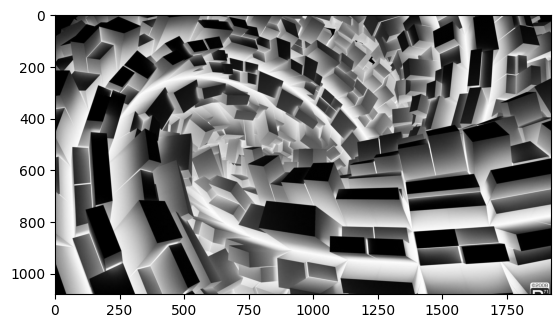

In [23]:
%matplotlib inline
# Write here your solution
# Import libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Read image
image = cv2.imread('grayscale.jpg', cv2.IMREAD_GRAYSCALE)

# Invert image
inverted_image = np.copy(image)
print(inverted_image.shape)
white_image = np.full(inverted_image.shape, 255)
print(white_image.shape)
inverted_image = white_image - inverted_image

# Display Image
plt.imshow(inverted_image, cmap='gray', vmin=0, vmax=255)
plt.show()

## Exercise 2: Invert RGB Image

#### Same as before, but in this case we want to compute the negative of a color image. The image has 3 channels, representing the 3 RGB values, the intensity of each channel ranges between [0 255]. For each image pixel, we need to substitute the (B,G,R) triplet with its «inverse» *(255-B, 255-G, 255-R)*.  Download *"avengers.png"*and test the program on it.

(549, 910, 3) uint8


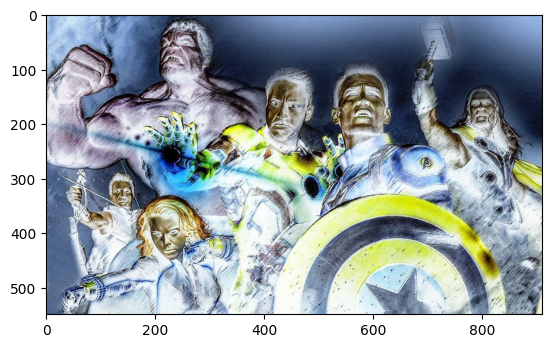

In [50]:
%matplotlib inline
# Write here your solution
# Import libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Read image
image = cv2.imread('avengers.png')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


# Invert image
mat255 = np.full(image_rgb.shape, 255, dtype=np.uint8)
inverted_image = mat255 - image_rgb
print(mat255.shape, inverted_image.dtype)

inverted_image = cv2.cvtColor(inverted_image, cv2.COLOR_RGB2BGR)
# Display Image
plt.imshow(inverted_image, vmin=0, vmax=255)
plt.show()


## Exercise 3: Differences between Images

#### 1: Compute the pixel-wise difference between two pictures : Image1 and Image2. Compute an output image where each pixel of coordinates (x,y) contains the absolute difference of the corresponding pixels on Image1 and Image2: Out(x,y) = abs(Image1(x,y) – Image2(x,y)). 
#### 2: Find all pixels with a mean difference (across R,G,B channels) higher than 0 and create a copy of Image1 obscuring (with value 0) those pixels. Display that image.
#### 3: Save the new image on disk and check the result. 
#### Test the exercise on Image 1:*"differences1.png"* and Image 2: *"differences2.png"*.

(720, 944, 3)
[0 0 0]
(720, 944)
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
(720, 944)


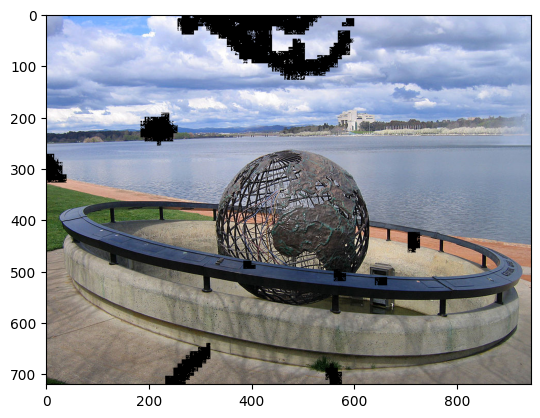

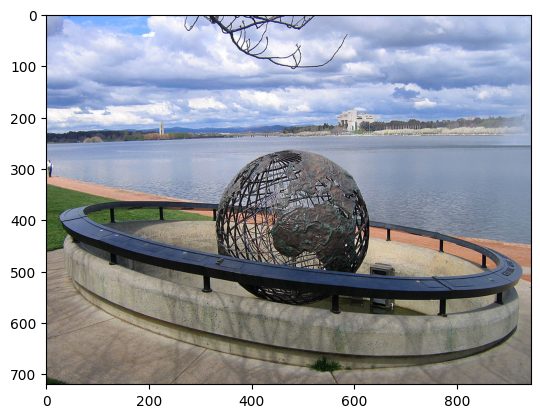

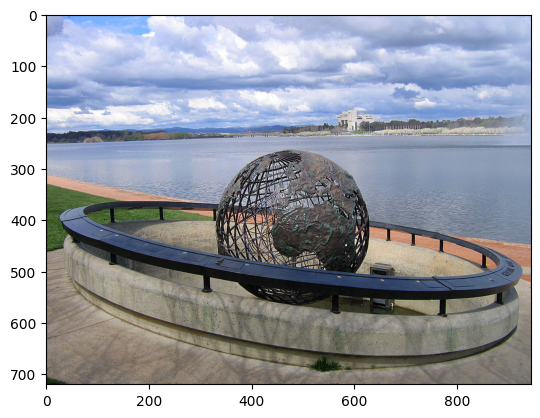

In [81]:
%matplotlib inline
# Write here your solution
# Import libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt
# Read images
image1 = cv2.imread('./Differences/differences1.png')
image2 = cv2.imread('./Differences/differences2.png')
image1_rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
# Perform Difference
diff = abs(image1_rgb - image2_rgb)
print(diff.shape)
# find mean difference map
print(diff[0, 0])
mean_diff_mat = np.mean(diff, axis=2)
print(mean_diff.shape)
mean_diff_zero_map = mean_diff_mat > 0
print(mean_diff_zero_map)
print(mean_diff.shape)

image_no_diff = np.copy(image1_rgb)
image_no_diff[mean_diff_zero_map] = [0,0,0]

# Display Image
plt.imshow(image_no_diff, vmin=0, vmax=255)
plt.show()
# plt.imshow(diff, vmin=0, vmax=255)
# plt.show()
# plt.imshow(mean_diff, vmin=0, vmax=255)
# plt.show()
plt.imshow(image1_rgb, vmin=0, vmax=255)
plt.show()
plt.imshow(image2_rgb, vmin=0, vmax=255)
plt.show()

In [ ]:
# Compute mean difference along last axis and mask image based on threshold

# Display Image


In [83]:
# Save image on disk
image_no_diff = cv2.cvtColor(image_no_diff, cv2.COLOR_RGB2BGR)
cv2.imwrite("image_no_diff.png", image_no_diff)

True

## Exercise 4 [OPTIONAL]: Classify 7-Segments Display Digits

#### Classify a digits of the 7-segment display. 

<img src="7segments.png" width="128" height="256">

#### In a 7-segment display each segment can be ON or OFF. In a binary image we identify 255 (white) as ON and 0 (black) as OFF. The order of the 7-segments is depicted in the image above. To understand the image location of the segments refer to sample images (1.png, ..., 9.png).

#### The combination of ON and OFF segments allows the display to show all possible digits from 0 to 9. A segment is defined ON if there are only white pixels (255) in that portion of an image. In test images each segment have a width of 20 pixels and an height of 128 pixels. Given a 256x128 digit image classify the correct number.

#### It is enough that the algorithm works on example images (a general solution is not required).

#### Test the program on digits images (1.png,  ..., 9.png). 

#### Tips (Only if you need help): 
* Identify the correct location (rows, columns range) for each segment based on example images (1.png, 2.png, etc). 
* Understand which segment is ON and OFF and save the status of each segment.
* Based on which segment is active look for the right digit.

In [ ]:
%matplotlib inline
# Write here your solution
# Import libraries


# Dictionary of ON segments for each possible digit.
# The order follows the scheme of the image above.
# For instance, digit 1 have only the segments 2 and 5 ON (1) while the others OFF (0).
SEGMENTS_DIGITS = {
(1, 1, 1, 0, 1, 1, 1): 0,
(0, 0, 1, 0, 0, 1, 0): 1,
(1, 0, 1, 1, 1, 0, 1): 2,
(1, 0, 1, 1, 0, 1, 1): 3,
(0, 1, 1, 1, 0, 1, 0): 4,
(1, 1, 0, 1, 0, 1, 1): 5,
(1, 1, 0, 1, 1, 1, 1): 6,
(1, 0, 1, 0, 0, 1, 0): 7,
(1, 1, 1, 1, 1, 1, 1): 8,
(1, 1, 1, 1, 0, 1, 1): 9
}

# List to track active elements
active_segments = [0,0,0,0,0,0,0]

# Find active elements

# Get the corresponding digit from the dictionary

# Results
